In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

%matplotlib inline 

from ipywidgets import *

import pickle_functions as PK
import plot_functions as PL
import helpers as HL
%load_ext autoreload

%autoreload 2
np.random.seed(123)

# Section III B-2: Applying the Algorithms, t-SNE

In this section, an ordinary Swiss roll with 1000 data points and noise set to 0.01 is used. The effect of the  hyperparameters for t-SNE are explored. 

In [2]:
folder="SectionB"

## Importing and plotting the data set: 

In [3]:
tsne_color,X,X_2d_tsne=PK.get_swiss_roll(folder,create=False)

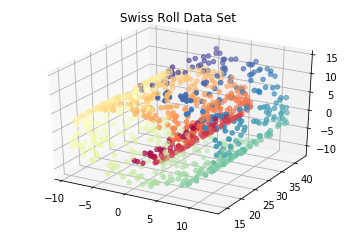

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=tsne_color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Data Set")
plt.savefig('dataset.pdf')
plt.show()

## Applying t-SNE

We want to apply the t-SNE algorithm, and play around with the hyperparameters.

# Analysing the effect of perpexity

In [5]:
"""Want to make an interactive plot with a wide range of perplexities. In order to do that we first create a list, Z,
consisting of a trnsformation for each perpelxity. It takes some time to create all of the transformations, therefore 
we have made them available in a pickle"""
p_Z,per,p_times,p_kl_divergence,p_differences=PK.perplexity(folder,create=False)

In [6]:
interactive(PL.plot_inter, Z=fixed(p_Z), color=fixed(tsne_color),var=fixed(per),transformation=fixed('t-sne'),
            variable=fixed('per'), i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0),
           error=fixed(p_kl_divergence),times=fixed(p_times),difference=fixed(p_differences)
           ,error_type=fixed('KL divergence'))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


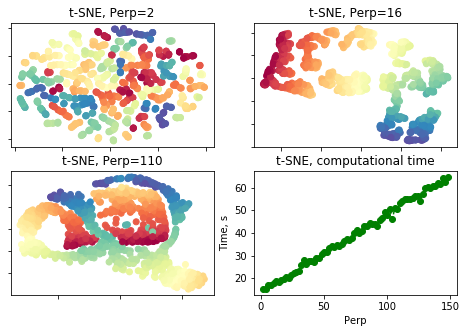

In [15]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Perp=2')
ax.scatter(p_Z[0][:, 0], p_Z[0][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(222)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Perp=16')
ax.scatter(p_Z[7][:, 0], p_Z[7][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(223)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Perp=110')
ax.scatter(p_Z[54][:, 0], p_Z[54][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(224)
ax.set_title('t-SNE, computational time')
ax.plot(per,p_times,'go--')  
ax.set_ylabel('Time, s')
ax.set_xlabel('Perp')
plt.savefig('tsne_original.pdf')

# Analysing the effect of early exaggeration

In [8]:
e_Z,early_exaggeration,e_times,e_kl_divergence,e_differences=PK.early_exxaggeration(folder,create=False)

In [9]:
interactive(PL.plot_inter, Z=fixed(e_Z), color=fixed(tsne_color),var=fixed(early_exaggeration),transformation=fixed('t-sne'),
            variable=fixed('early_exaggeration'), i=widgets.IntSlider(min=0,max=len(early_exaggeration)-1,step=1, value=0),
           error=fixed(e_kl_divergence),times=fixed(e_times),difference=fixed(e_differences)
           ,error_type=fixed('KL divergence'))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of learning rate

In [10]:
l_Z,learning_rates,l_times,l_kl_divergence,l_differences=PK.learning_rates(folder,create=False)

In [11]:
interactive(PL.plot_inter, transformation=fixed('t-sne'), Z=fixed(l_Z), color=fixed(tsne_color),
            var=fixed(learning_rates),variable=fixed('learning_rate'), 
            i=widgets.IntSlider(min=0,max=len(learning_rates)-1,step=1, value=0),
           error=fixed(l_kl_divergence),times=fixed(l_times),difference=fixed(l_differences)
           ,error_type=fixed('KL divergence'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of threshold on norm of gradient

In [12]:
t_Z,threshold,t_times,t_kl_divergence,t_differences=PK.threshold(folder,create=False)

In [13]:

interactive(PL.plot_inter,transformation=fixed('t-sne'), Z=fixed(t_Z), color=fixed(tsne_color),var=fixed(threshold)
            ,variable=fixed('threshold'), i=widgets.IntSlider(min=0,max=len(threshold)-1,step=1, value=0),
           error=fixed(t_kl_divergence),times=fixed(t_times),difference=fixed(t_differences)
           ,error_type=fixed('KL divergence'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


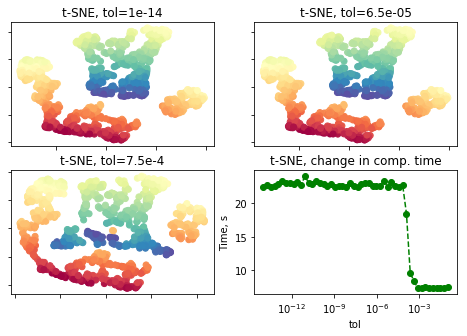

In [14]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(222)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, tol=6.5e-05')
ax.scatter(t_Z[37][:, 0], t_Z[37][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(223)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, tol=7.5e-4')
ax.scatter(t_Z[41][:, 0], t_Z[41][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(221)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, tol=1e-14')
ax.scatter(t_Z[0][:, 0], t_Z[0][:, 1], c=tsne_color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(224)
ax.set_title('t-SNE, computational time')
plt.xscale('log')
ax.plot(threshold,t_times,'go--')  
ax.set_ylabel('Time, s')
ax.set_xlabel('tol')
plt.savefig('tsne_threshold_original.pdf')